## Building a Machine Learning Model for predicting and Enhancing Customer Segmentation and Personalized Marketing in E-Commerce

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

### Dataset

In [2]:
file_path = 'online_retail_II.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Dataset  Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# find unique values in each column
df.nunique()

Invoice        25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
Price           1630
Customer ID     4372
Country           38
dtype: int64

In [6]:
missing_values = df.isnull().sum()
missing_values

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
# Frequent values in the 'StockCode' column
df['StockCode'].value_counts().head()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

In [8]:
# Average price per item
average_price_per_item = df.groupby('StockCode')['Price'].mean()
average_price_per_item.head()

StockCode
10002     1.056849
10080     0.376667
10120     0.210000
10123C    0.487500
10123G    0.000000
Name: Price, dtype: float64

In [9]:
# InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# New column for total sales per transaction
df['TotalSales'] = df['Quantity'] * df['Price']

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
# Determine total sales per country
total_sales_per_country = df.groupby('Country')['TotalSales'].sum()
total_sales_per_country.sort_values(ascending=False).head()

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197421.900
Name: TotalSales, dtype: float64

In [12]:
# Extract the Month from InvoiceDate column
df['Month'] = df['InvoiceDate'].dt.month

# Monthly sales trends
monthly_sales = df.groupby('Month')['TotalSales'].sum()
print(monthly_sales)


Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182643.030
Name: TotalSales, dtype: float64


In [13]:
# Get total quantity sold per StockCode
total_quantity_per_product = df.groupby('StockCode')['Quantity'].sum()

# Top-selling products
top_selling_products = total_quantity_per_product.sort_values(ascending=False).head()
top_selling_products


StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64

In [14]:
average_invoice_value = df.groupby('Invoice')['TotalSales'].sum().mean()
print(f"Average Invoice Value: {average_invoice_value}")

Average Invoice Value: 376.36161907335907


In [15]:
# Average quantity per transaction
average_quantity_per_transaction = df.groupby('Invoice')['Quantity'].mean()
print(f"Average Quantity per Transaction: {average_quantity_per_transaction.mean()}")

Average Quantity per Transaction: 12.847243871780494


### Dataset Visualization

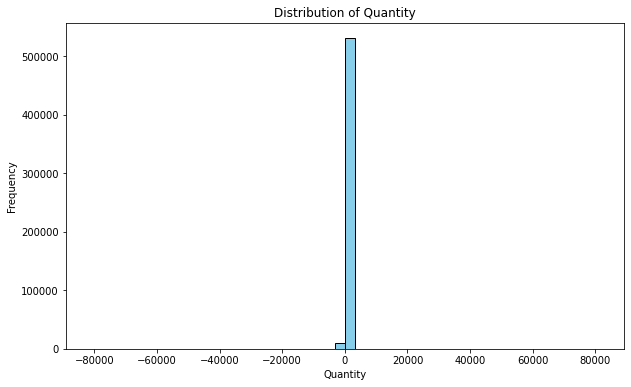

In [16]:
# distribution of 'Quantity'
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

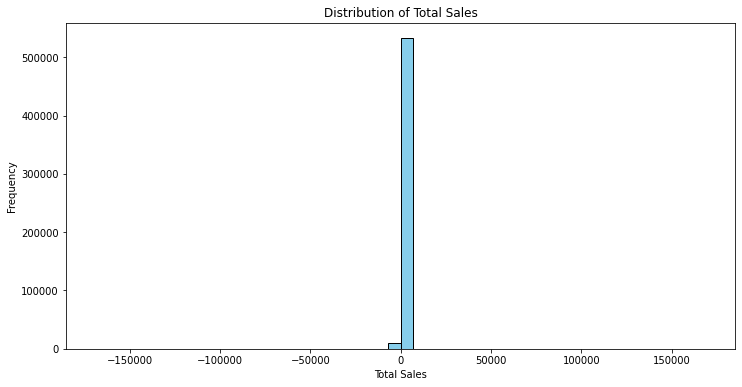

In [17]:
# Distribution plot for TotalSales
plt.figure(figsize=(12, 6))
plt.hist(df['TotalSales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

**Distribution of quantity & total sales:**
Maximum transactions have a total quantity and sales close to zero which indicates large small transactions

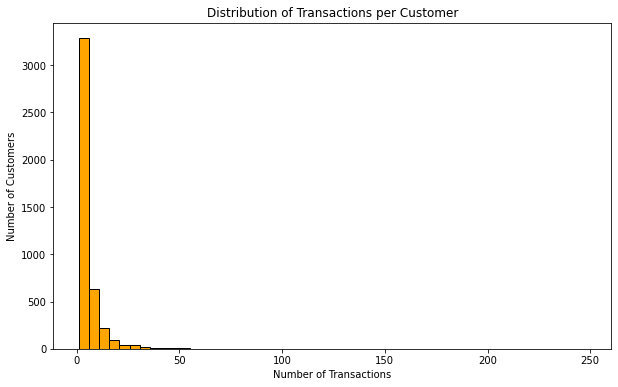

In [18]:
# number of transactions per customer
transactions_per_customer = df.groupby('Customer ID')['Invoice'].nunique()

plt.figure(figsize=(10, 6))
plt.hist(transactions_per_customer, bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()


**Distribution of Transactions per Customer:**
Maximum Customers have a total transactions close to zero and very less clients have transactions between 25 to 50

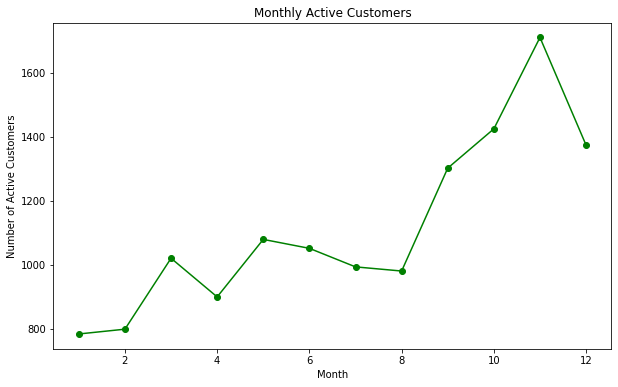

In [19]:
# Active customers per month
monthly_active_customers = df.groupby('Month')['Customer ID'].nunique()

# Plot the monthly active customers
plt.figure(figsize=(10, 6))
plt.plot(monthly_active_customers, marker='o', color='green')
plt.title('Monthly Active Customers')
plt.xlabel('Month')
plt.ylabel('Number of Active Customers')
plt.show()


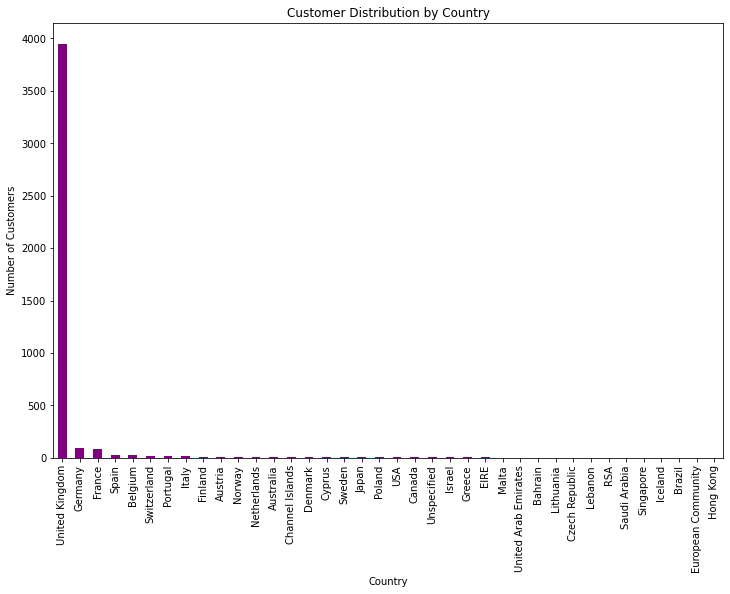

In [20]:
# Unique customers per country
customers_per_country = df.groupby('Country')['Customer ID'].nunique()

# Plot the customer distribution by country
plt.figure(figsize=(12, 8))
customers_per_country.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()


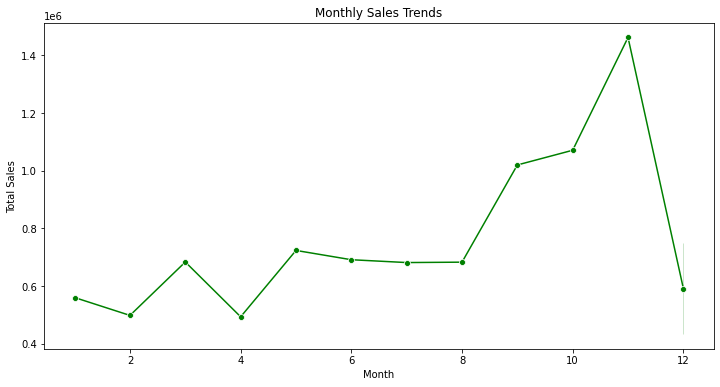

In [21]:
# Intermediate Level Visualization: Monthly Sales Trends
df['Year'] = df['InvoiceDate'].dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalSales', data=df.groupby(['Month', 'Year'])['TotalSales'].sum().reset_index(), marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


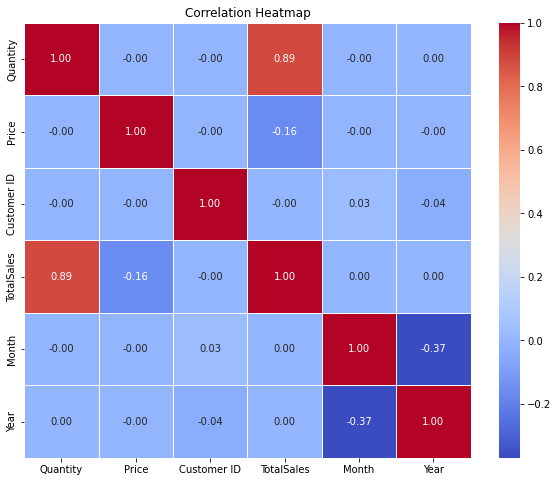

In [22]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


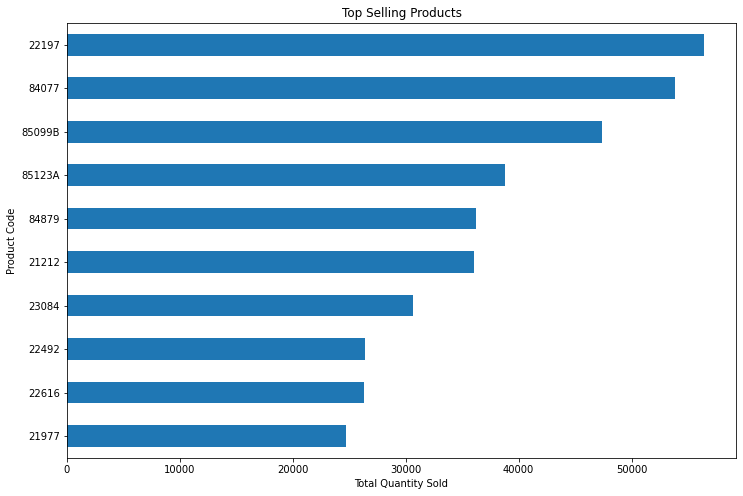

In [23]:
# Top Selling Products (Horizontal Bar Chart)
plt.figure(figsize=(12, 8))
top_selling_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_selling_products.sort_values().plot(kind='barh')
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Code')
plt.show()

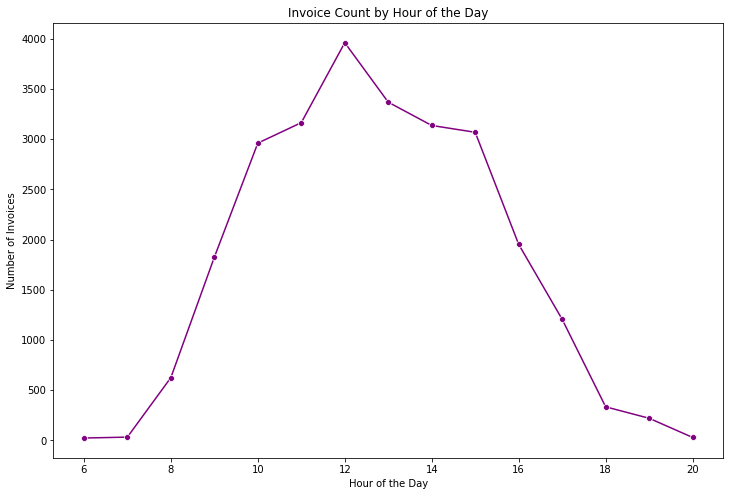

In [24]:
# Invoice Count by Hour of the Day 
df['Hour'] = df['InvoiceDate'].dt.hour
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Invoice', data=df.groupby('Hour')['Invoice'].nunique().reset_index(), marker='o', color='purple')
plt.title('Invoice Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Invoices')
plt.show()


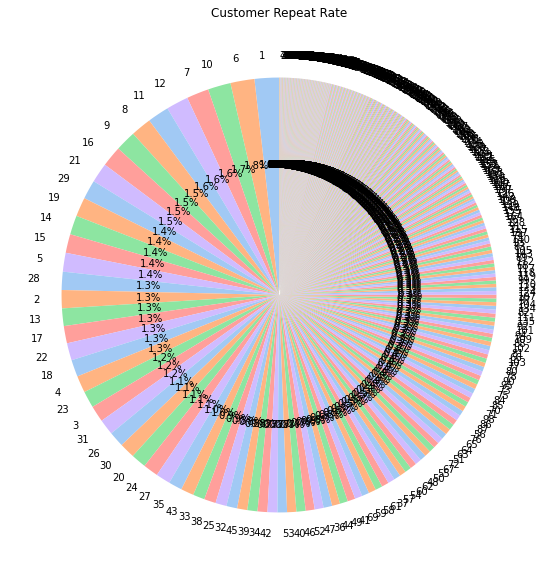

In [25]:
# Customer Repeat Rate 
repeat_customers = df['Customer ID'].value_counts().value_counts().reset_index().rename(columns={'index': 'Number of Purchases', 'Customer ID': 'Count'})
plt.figure(figsize=(10, 10))
plt.pie(repeat_customers['Count'], labels=repeat_customers['Number of Purchases'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel')[0:5])
plt.title('Customer Repeat Rate')
plt.show()


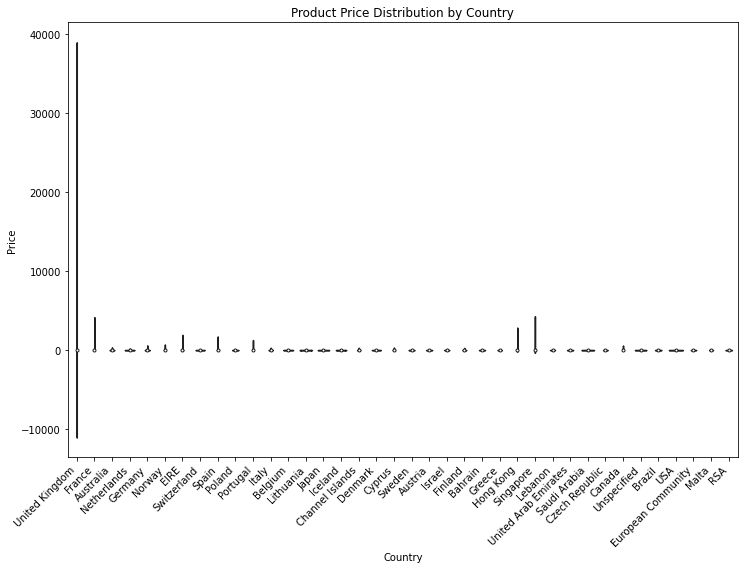

In [26]:
# Product Price Distribution by Country 
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Price', data=df, palette='viridis')
plt.title('Product Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


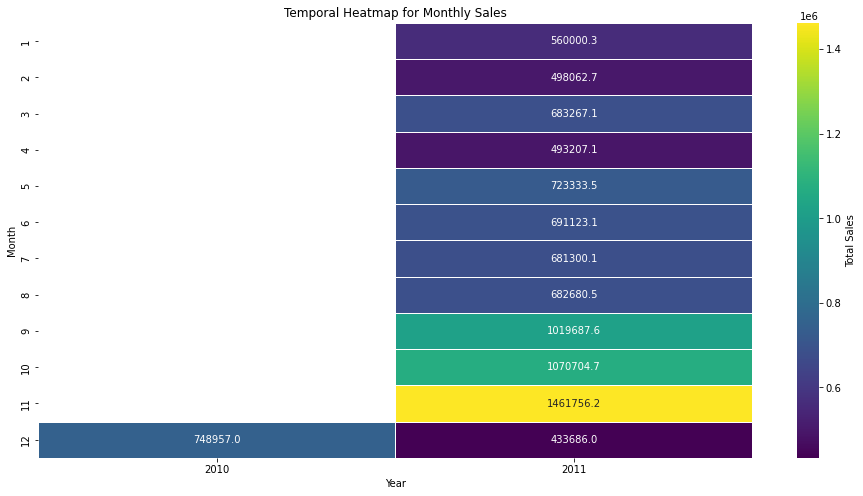

In [27]:
# Temporal Heatmap for Monthly Sales
plt.figure(figsize=(16, 8))

# Pivot the data for heatmap
heatmap_data = df.pivot_table(index='Month', columns='Year', values='TotalSales', aggfunc='sum')

# Plotting the heatmap
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Total Sales'})
plt.title('Temporal Heatmap for Monthly Sales')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


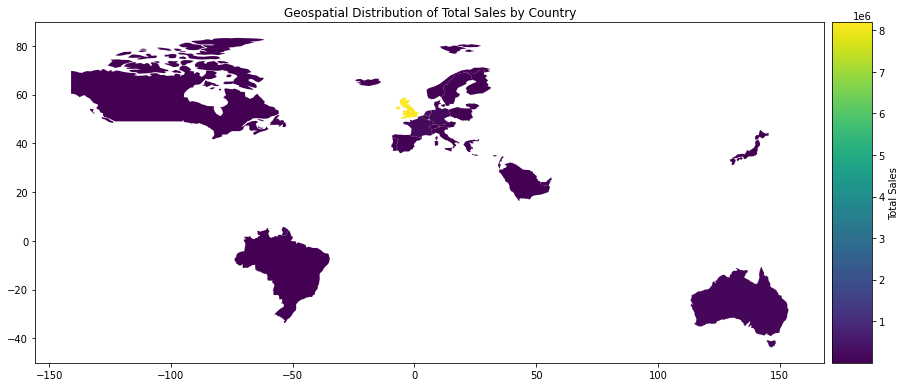

In [28]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with total sales per country
sales_by_country = df.groupby('Country')['TotalSales'].sum().reset_index()
world = world.merge(sales_by_country, how='left', left_on='name', right_on='Country')

# Plot the geospatial distribution of sales (Choropleth Map)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='TotalSales', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Total Sales"})
ax.set_title('Geospatial Distribution of Total Sales by Country')
plt.show()


<Figure size 1152x576 with 0 Axes>

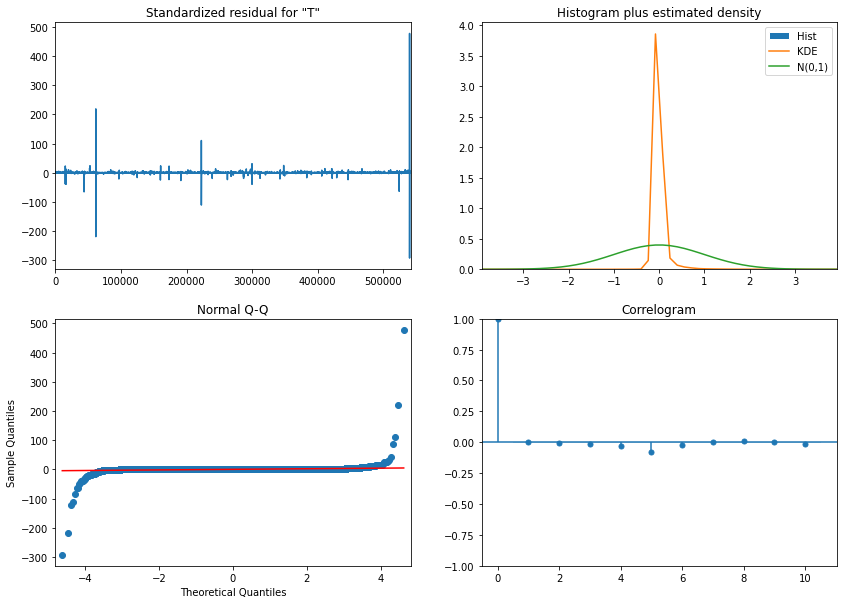

In [172]:
# ARIMA Model Diagnostic Plots
plt.figure(figsize=(16, 8))

# Fit ARIMA model
model = ARIMA(df.set_index('InvoiceDate')['TotalSales'], order=(5, 1, 2))
fit_model = model.fit()

# Plot diagnostics
fit_model.plot_diagnostics(figsize=(14, 10))
plt.show()


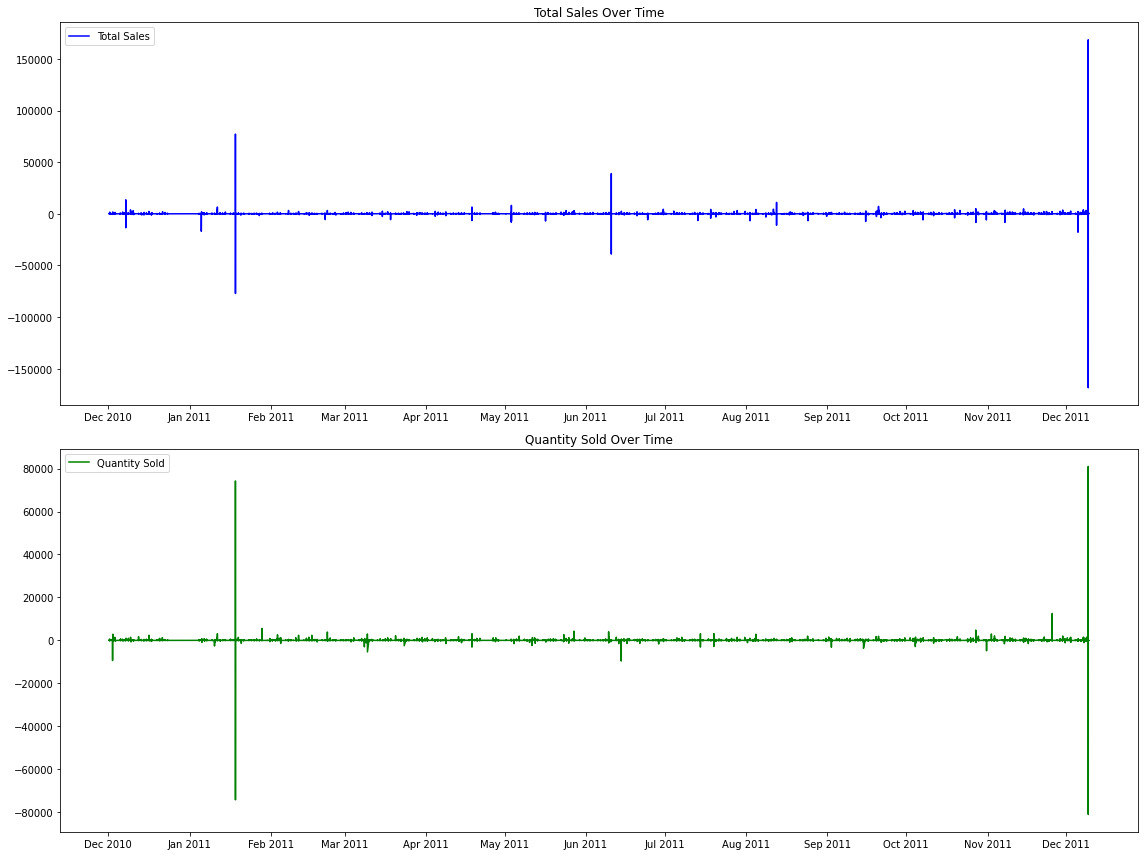

In [29]:
# Multivariate Time Series Plot with Subplots
plt.figure(figsize=(16, 12))

# Set up subplots
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)

# Plot Total Sales
ax1.plot(df.set_index('InvoiceDate')['TotalSales'], label='Total Sales', color='blue')
ax1.set_title('Total Sales Over Time')
ax1.legend()

# Plot Quantity Sold
ax2.plot(df.set_index('InvoiceDate')['Quantity'], label='Quantity Sold', color='green')
ax2.set_title('Quantity Sold Over Time')
ax2.legend()

# Format x-axis to show months
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()


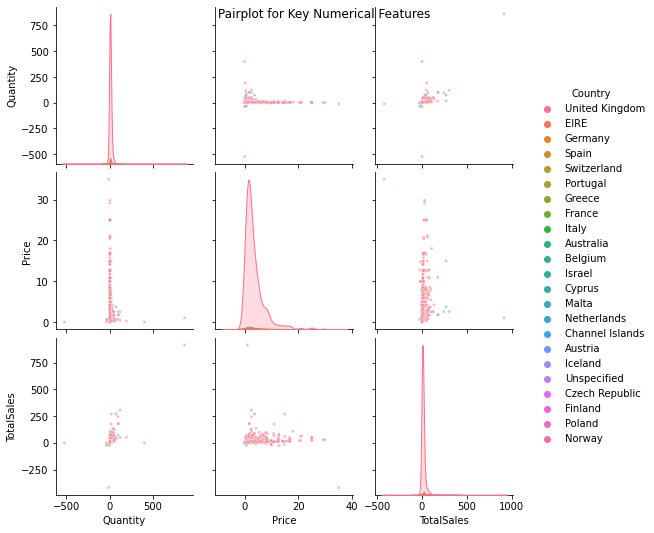

In [30]:
# Pairplot for Key Numerical Features
numerical_features = ['Quantity', 'Price', 'TotalSales']

# Subsample the data for better visualization (optional)
subset_data = df.sample(1000)

# Plotting the pairplot
sns.pairplot(subset_data, vars=numerical_features, hue='Country', markers='.', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot for Key Numerical Features')
plt.show()


#### Dataset Correlation Analysis

In [31]:
# Display the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Quantity,Price,Customer ID,TotalSales,Month,Year,Hour
Quantity,1.000000,-0.001235,-0.003600,0.886681,-0.001116,0.002001,-0.011268
Price,-0.001235,1.000000,-0.004560,-0.162029,-0.000497,-0.004586,0.001268
Customer ID,-0.003600,-0.004560,1.000000,-0.002274,0.030607,-0.035956,0.064164
TotalSales,0.886681,-0.162029,-0.002274,1.000000,0.000141,0.000275,-0.009120
Month,-0.001116,-0.000497,0.030607,0.000141,1.000000,-0.369593,0.025648
Year,0.002001,-0.004586,-0.035956,0.000275,-0.369593,1.000000,-0.010921
Hour,-0.011268,0.001268,0.064164,-0.009120,0.025648,-0.010921,1.000000


### Dataset Cleaning

In [32]:
# drop null values
df.dropna(inplace=True)
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalSales     0
Month          0
Year           0
Hour           0
dtype: int64

In [33]:
df[df.duplicated()].shape

(5225, 12)

In [34]:
df = df.drop_duplicates(keep='first')
df.shape

(401605, 12)

In [35]:
# invoice with 'C' means cancelled
df[df['Invoice'].str.contains('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,Month,Year,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,12,2010,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,12,2010,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,12,2010,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,2010,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,12,2010,10
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,12,2011,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,12,2011,10
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,12,2011,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,12,2011,11


In [36]:
# Drop data with "C" in Invoice
df = df[~df['Invoice'].str.contains('C')]
df.shape

(392733, 12)

In [37]:
# checking if any data row with price as 0
df[df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,Month,Year,Hour
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,12,2010,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,12,2010,14
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,12,2010,13
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1,2011,16
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1,2011,16
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0,1,2011,15
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0,2,2011,13
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0,3,2011,10
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0,3,2011,12
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0,4,2011,14


In [38]:
# Remove rows with Price as 0 
df = df[df['Price']>0]
df.shape

(392693, 12)

### RFM - Recency, Frequency, and Monetary

In [39]:
# Calculate Recency, Frequency, and Monetary values for each customer

# Set a reference date for recency calculation
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary values
rfm_data = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda InvoiceDate: (reference_date - InvoiceDate.max()).days,
    'Invoice': lambda Invoice: Invoice.nunique(),
    'TotalSales': lambda TotalSales: TotalSales.sum()
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalSales': 'Monetary'
})


In [40]:
rfm_data.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [41]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2048.692230
std,100.014169,7.697998,8985.229676
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,306.482500
50%,51.000000,2.000000,668.570000
75%,142.000000,5.000000,1660.597500
max,374.000000,209.000000,280206.020000


### Customer Segmentation - Using Scoring RFM Metrics

In [42]:
cs_rfm_data = rfm_data.copy()

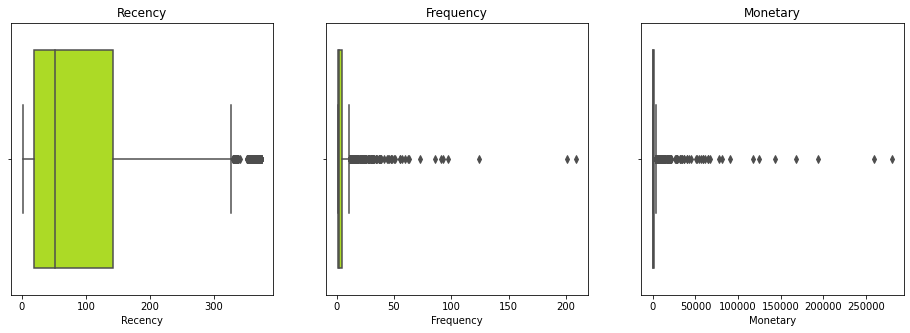

In [43]:
# Check for Outliers using Boxplots
plt.figure(figsize=(16, 5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(x=cs_rfm_data['Recency'], color='#baf808')
plt.title('Recency')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x=cs_rfm_data['Frequency'], color='#baf808')
plt.title('Frequency')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x=cs_rfm_data['Monetary'], color='#baf808')
plt.title('Monetary')

plt.show()

In [44]:
# Replace outliers with the Bound values
for col in cs_rfm_data.columns:
    # calculate Q1 and Q3
    Q1 = cs_rfm_data[col].quantile(0.25)
    Q3 = cs_rfm_data[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Identify outliers using boolean masks
    lower_bound_mask = (cs_rfm_data[col] < (Q1 - 1.5 * IQR))
    upper_bound_mask = (cs_rfm_data[col] > (Q3 + 1.5 * IQR))
    
    # Replace outliers with lower and upper bounds
    cs_rfm_data[col] = cs_rfm_data[col].mask(lower_bound_mask, Q1 - 1.5 * IQR)
    cs_rfm_data[col] = cs_rfm_data[col].mask(upper_bound_mask, Q3 + 1.5 * IQR)

In [45]:
# Create quantiles for Recency, Frequency, and Monetary value
r_bins = np.linspace(0, cs_rfm_data['Recency'].max()+1, 6, dtype=int)
f_bins = np.linspace(0, cs_rfm_data['Frequency'].max()+1, 6, dtype=int)
m_bins = np.linspace(0, cs_rfm_data['Monetary'].max()+1, 6, dtype=int)

In [46]:
# Assign R, F, and M scores to each customer based on their quartile
cs_rfm_data['R'] = pd.cut(cs_rfm_data['Recency'], bins=r_bins, labels=[5, 4, 3, 2, 1])
cs_rfm_data['F'] = pd.cut(cs_rfm_data['Frequency'], bins=f_bins, labels=[1, 2, 3, 4, 5])
cs_rfm_data['M'] = pd.cut(cs_rfm_data['Monetary'], bins=m_bins, labels=[1, 2, 3, 4, 5])

In [47]:
# Create the RFM score using the R, F, and M scores.
cs_rfm_data["RFM_Score"] = cs_rfm_data["R"].astype(str) + cs_rfm_data["F"].astype(str) + cs_rfm_data["M"].astype(str)

In [48]:
cs_rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
Customer ID,,,,,,,
12346.0,326.0,1.0,3691.77,1,1,5,115
12347.0,2.0,7.0,3691.77,5,3,5,535
12348.0,75.0,4.0,1797.24,4,2,3,423
12349.0,19.0,1.0,1757.55,5,1,3,513
12350.0,310.0,1.0,334.40,1,1,1,111


In [49]:
cs_rfm_data["RF_Score"] = cs_rfm_data["R"].astype(str) + cs_rfm_data["F"].astype(str)
cs_rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RF_Score
Customer ID,,,,,,,,
12346.0,326.0,1.0,3691.77,1,1,5,115,11
12347.0,2.0,7.0,3691.77,5,3,5,535,53
12348.0,75.0,4.0,1797.24,4,2,3,423,42
12349.0,19.0,1.0,1757.55,5,1,3,513,51
12350.0,310.0,1.0,334.40,1,1,1,111,11


In [50]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [51]:
cs_rfm_data["segment"] = cs_rfm_data["RF_Score"].replace(seg_map, regex = True)

In [52]:
cs_rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RF_Score,segment
Customer ID,,,,,,,,,
12346.0,326.0,1.0,3691.77,1,1,5,115,11,Hibernating
12347.0,2.0,7.0,3691.77,5,3,5,535,53,Potential Loyalists
12348.0,75.0,4.0,1797.24,4,2,3,423,42,Potential Loyalists
12349.0,19.0,1.0,1757.55,5,1,3,513,51,New Customers
12350.0,310.0,1.0,334.40,1,1,1,111,11,Hibernating


In [53]:
cs_rfm_data['segment'].value_counts(normalize=True)

Potential Loyalists    0.300830
New Customers          0.214154
Hibernating            0.172891
Champions              0.120562
Promising              0.094283
About to Sleep         0.084140
Loyal Customers        0.006685
Need Attention         0.003458
At Risk                0.002536
Can't Lose             0.000461
Name: segment, dtype: float64

**Targeted Marketing Campaigns:**
1. **Potential Loyalists and New Customers (51.55%):** Focus on attracting and retaining these segments. Run special promotions, loyalty programs, and personalized offers to encourage repeat purchases and build brand loyalty.
2. **Hibernating and About to Sleep (25.02%):** Implement reactivation campaigns to win back these customers. Provide incentives, discounts, or exclusive offers to re-engage them.  

**Product Recommendations:**
1. **Champions (12.06%):** These are highly valuable customers. Suggest premium products, exclusive deals, or early access to new collections to maintain their loyalty.
2. **Promising and Loyal Customers (10.08%):** Continue providing personalized recommendations  


**Need Attention, At Risk, and Can't Lose (1.1%):** These segments require different approaches.
1. **Need Attention:** Reach out with targeted communications, offering assistance and addressing concerns.
2. **Feedback from At-Risk Customers:** Gather feedback from the 'At Risk' segment to understand their concerns and improve the customer experience. Implement retention strategies, such as personalized discounts or special offers.
3. **Can't Lose:** Ensure these valuable customers are satisfied and consider personalized gestures to maintain their loyalty.
4. **About to Sleep:** Time-limited promotions or reminders about products they have shown interest in can be effective in rekindling their engagement.


### Customer Segmentation Using Kmeans

In [54]:
!pip install kneed

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [56]:
kmean_clus = rfm_data.copy()

In [57]:
# Replace outliers with the Bound values
for col in kmean_clus.columns:
    # calculate Q1 and Q3
    Q1 = kmean_clus[col].quantile(0.25)
    Q3 = kmean_clus[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Identify outliers using boolean masks
    lower_bound_mask = (kmean_clus[col] < (Q1 - 1.5 * IQR))
    upper_bound_mask = (kmean_clus[col] > (Q3 + 1.5 * IQR))
    
    # Replace outliers with lower and upper bounds
    kmean_clus[col] = kmean_clus[col].mask(lower_bound_mask, Q1 - 1.5 * IQR)
    kmean_clus[col] = kmean_clus[col].mask(upper_bound_mask, Q3 + 1.5 * IQR)

In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmean_clus)
scaled_df = pd.DataFrame(scaled_features, columns=kmean_clus.columns)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   float64
 1   Frequency  4338 non-null   float64
 2   Monetary   4338 non-null   float64
dtypes: float64(3)
memory usage: 101.8 KB


In [59]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

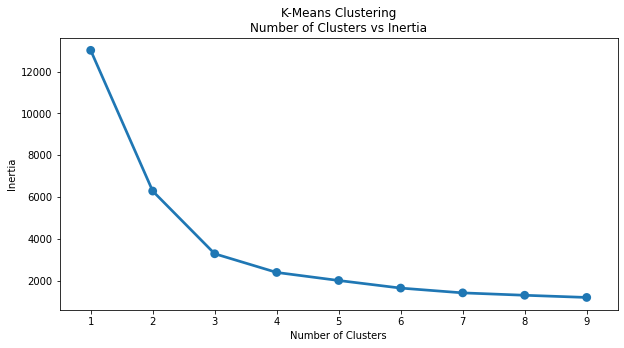

In [60]:
plt.figure(figsize=(10, 5))
ax = sns.pointplot(x=list(range(1, 10)), y=inertia)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Inertia')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [61]:
# Identifying the optimal number of clusters using KneeLocator
kl = KneeLocator(range(1, 10), inertia, curve='convex', direction="decreasing")
optimal_clusters = kl.elbow

In [62]:
optimal_clusters

3

In [63]:
# Applying K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, max_iter=300, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(scaled_features)

# Creating a DataFrame with cluster labels
cluster_df = pd.DataFrame(cluster_labels, index=rfm_data.index, columns=['Cluster_Labels'])
cluster_df.head()

,Cluster_Labels
Customer ID,
12346.0,0
12347.0,1
12348.0,2
12349.0,2
12350.0,0


In [64]:
# Joining the cluster labels with the original data
clustered_rfm = rfm_data.join(cluster_df)

In [65]:
clustered_rfm.head()

,Recency,Frequency,Monetary,Cluster_Labels
Customer ID,,,,
12346.0,326,1,77183.60,0
12347.0,2,7,4310.00,1
12348.0,75,4,1797.24,2
12349.0,19,1,1757.55,2
12350.0,310,1,334.40,0


In [66]:
# Displaying the distribution of customers across clusters
cluster_distribution = clustered_rfm['Cluster_Labels'].value_counts(normalize=True)
cluster_distribution

2    0.536422
0    0.241355
1    0.222222
Name: Cluster_Labels, dtype: float64

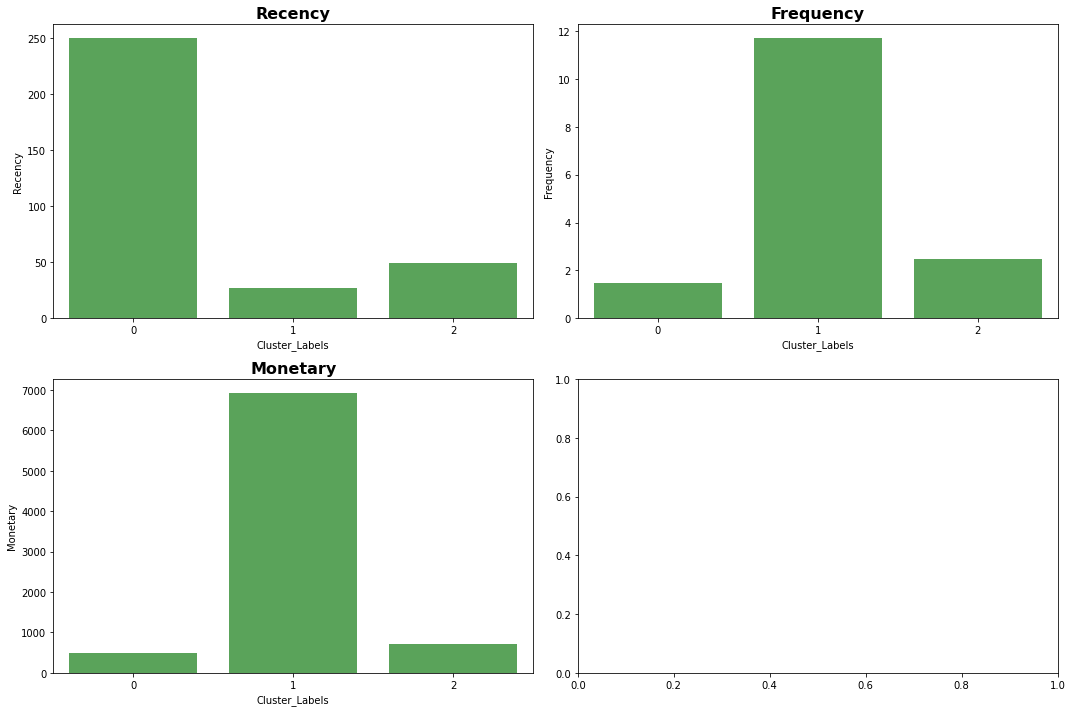

In [67]:
clus_mean = clustered_rfm.groupby('Cluster_Labels').mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, col in enumerate(clus_mean.columns):
    ax = axes[i // 2, i % 2]  # Adjusting subplot indexing
    sns.barplot(x=clus_mean.index, y=clus_mean[col], data=clus_mean, color='#4eaf4e', ax=ax)
    ax.set_title(col, fontweight='bold', fontsize=16)

plt.tight_layout()
plt.show()


In [68]:
clus_mean

,Recency,Frequency,Monetary
Cluster_Labels,,,
0,249.529131,1.471824,497.868473
1,26.943983,11.691909,6924.969741
2,49.072626,2.458101,726.380650


**Cluster labeling indicates the grouping of customer based on data set and using cluter label we can recommend customers with stock(s)**  

1. Cluster 0 with highest recency rate and lowest frequency and monetary as compared to cluster 1 and 2 is low value customers.
2. Cluster 1 with lowest recency along with highest frequency and monetary rate is high value customers.
3. Cluster 2 with normal recency rate along with good frequency and monetary rate is middle value customers.


### Testing for Customer Segmentation - Using Scoring RFM Metrics

Visual inspection of boxplots for Recency, Frequency, and Monetary values. 
This helps ensure that extreme values are appropriately handled.

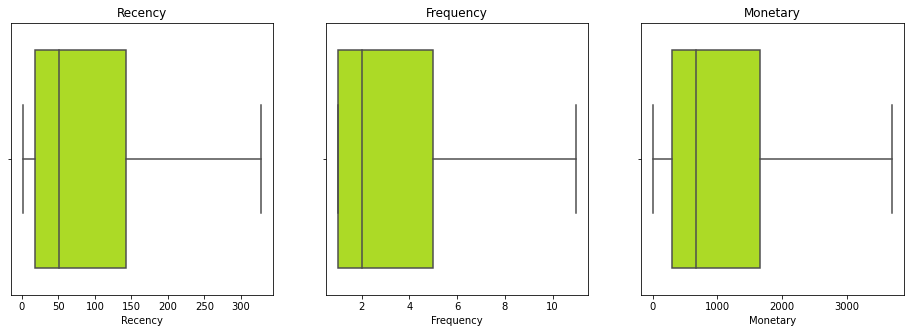

In [79]:
# Check for Outliers using Boxplots
plt.figure(figsize=(16, 5))

# Recency
plt.subplot(1, 3, 1)
sns.boxplot(x=cs_rfm_data['Recency'], color='#baf808')
plt.title('Recency')

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x=cs_rfm_data['Frequency'], color='#baf808')
plt.title('Frequency')

# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x=cs_rfm_data['Monetary'], color='#baf808')
plt.title('Monetary')

plt.show()


### Testing Of K-means

**Silhouette Score**

In [80]:
# Values range from -1 to 1
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5096326650715863


**Inertia (Within-Cluster Sum of Squares)**

In [70]:
inertia = kmeans_optimal.inertia_
print(f"Inertia: {inertia}")


Inertia: 3286.8892210799227


The Silhouette Score of approximately 0.51 suggests that clusters have a reasonable degree of separation and cohesion. 
It falls within the range of -1 to 1, where higher values indicate better-defined clusters. In the context of clustering, 
a score around 0.5 is often considered good.

The Inertia of 3286.89 represents the within-cluster sum of squares. The Elbow Method is commonly used to determine the 
optimal number of clusters based on the trade-off between minimizing inertia and the number of clusters. Elbow method 
is used above to get optimal cluster value. 

**visual Inspection**

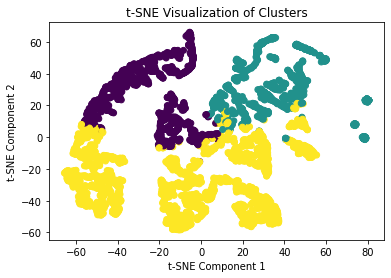

In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


**Cluster Profile**

In [77]:
cluster_profiles = clustered_rfm.groupby('Cluster_Labels').mean()
print(cluster_profiles)


                   Recency  Frequency     Monetary
Cluster_Labels                                    
0               249.529131   1.471824   497.868473
1                26.943983  11.691909  6924.969741
2                49.072626   2.458101   726.380650


**Cluster Distribution**

In [78]:
cluster_distribution = clustered_rfm['Cluster_Labels'].value_counts(normalize=True)
print("Cluster Distribution:\n", cluster_distribution)


Cluster Distribution:
 2    0.536422
0    0.241355
1    0.222222
Name: Cluster_Labels, dtype: float64
